In [33]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

---

In [34]:
#from google.colab import drive
#drive.mount('/content/drive')
import os
import csv
file_path = os.path.join("clean_loan_data.csv")

## Data Preprocessing



### Step 1: Read the `loan.csv` data from the `Resources` folder into a Pandas DataFrame.

In [35]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
#file_path = Path(f'{path}loan.csv')
loan_data = pd.read_csv(file_path)

# Review the DataFrame
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [36]:
# Drop Loan_ID column

columns_to_delete = ['Loan_ID']

loan_data = loan_data.drop(columns = columns_to_delete)

In [37]:
# Split to train and test. Splitting before knn imputing required for fitting imputer on train and fill NaNs using it on test
df_train, df_test = train_test_split(loan_data, test_size=0.2, random_state=1)

In [38]:
# Separately transforming the Loan_Status column without using OHE, since it needs to remain in one copy

loan_data['Loan_Status'] = loan_data['Loan_Status'].map({'N': 0, 'Y': 1})
loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [39]:
# Looking at the missing values
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


In [40]:
# get categorical and numerical columns
categorical_columns = loan_data.select_dtypes(include=['object', 'category']).columns
numerical_columns = loan_data.select_dtypes(include=['int64', 'float64']).columns


In [41]:
#Impute missing values for continuous data only (LoanAmount, Loan_Amount_Term)

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Apply the KNN imputer to the numerical columns
df_train[numerical_columns] = imputer.fit_transform(df_train[numerical_columns])

# apply to test !IMPORTANT! for prevent data leak
df_test[numerical_columns] = imputer.transform(df_test[numerical_columns])



ValueError: could not convert string to float: 'N'

In [42]:
# Looking at the number of unique values ​​of categorical variables; if there are few of them, this allows us to use OHE
for i in categorical_columns:
    print(i, loan_data[i].nunique())

Gender 2
Married 2
Dependents 4
Education 2
Self_Employed 2
Property_Area 3


In [43]:
# Change all categorical columns to binary using get dummies
clean_train_df = pd.get_dummies(df_train, columns=['Gender','Married','Dependents','Education',
                                                    'Self_Employed','Property_Area'])
clean_test_df = pd.get_dummies(df_test, columns=['Gender','Married','Dependents','Education',
                                                    'Self_Employed','Property_Area'])

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [44]:
# Separate the data into labels and features
# Separate the y variable, the labels
y_train = clean_train_df['Loan_Status']
y_test = clean_test_df['Loan_Status']

# Separate the X variable, the features
X_train = clean_train_df.drop('Loan_Status', axis=1)
X_test = clean_test_df.drop('Loan_Status', axis=1)
print(y_train)
print(y_test)
print(X_train)
X_test

291    N
507    N
328    N
609    Y
69     N
      ..
129    N
144    Y
72     Y
235    Y
37     Y
Name: Loan_Status, Length: 491, dtype: object
533    N
544    Y
41     Y
148    N
111    Y
      ..
341    N
404    N
247    Y
464    N
493    Y
Name: Loan_Status, Length: 123, dtype: object
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
291             4400                0.0       127.0             360.0   
507             3583                0.0        96.0             360.0   
328             4333             2451.0       110.0             360.0   
609             2900                0.0        71.0             360.0   
69              4300                0.0       136.0             360.0   
..               ...                ...         ...               ...   
129             6080             2569.0       182.0             360.0   
144            11757                0.0       187.0             180.0   
72              3500                0.0        81.0  

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
533,11250,0.0,196.0,360.0,NaN,False,True,True,False,False,True,False,False,True,False,True,False,False,True,False
544,3017,663.0,102.0,360.0,NaN,True,False,False,True,True,False,False,False,False,True,True,False,False,True,False
41,1800,1213.0,47.0,360.0,1.0,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True
148,10000,1666.0,225.0,360.0,1.0,True,False,True,False,True,False,False,False,True,False,True,False,True,False,False
111,2929,2333.0,139.0,360.0,1.0,True,False,False,True,True,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,2378,0.0,46.0,360.0,1.0,True,False,True,False,True,False,False,False,True,False,True,False,True,False,False
404,7441,0.0,194.0,360.0,1.0,True,False,True,False,True,False,False,False,True,False,False,True,True,False,False
247,6608,0.0,137.0,180.0,1.0,False,True,False,True,False,True,False,False,False,True,True,False,False,False,True
464,4166,0.0,98.0,360.0,0.0,False,True,True,False,True,False,False,False,True,False,True,False,False,True,False


---

## Create a Linear Regression Model with the Original Data

In [45]:
# Import required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression


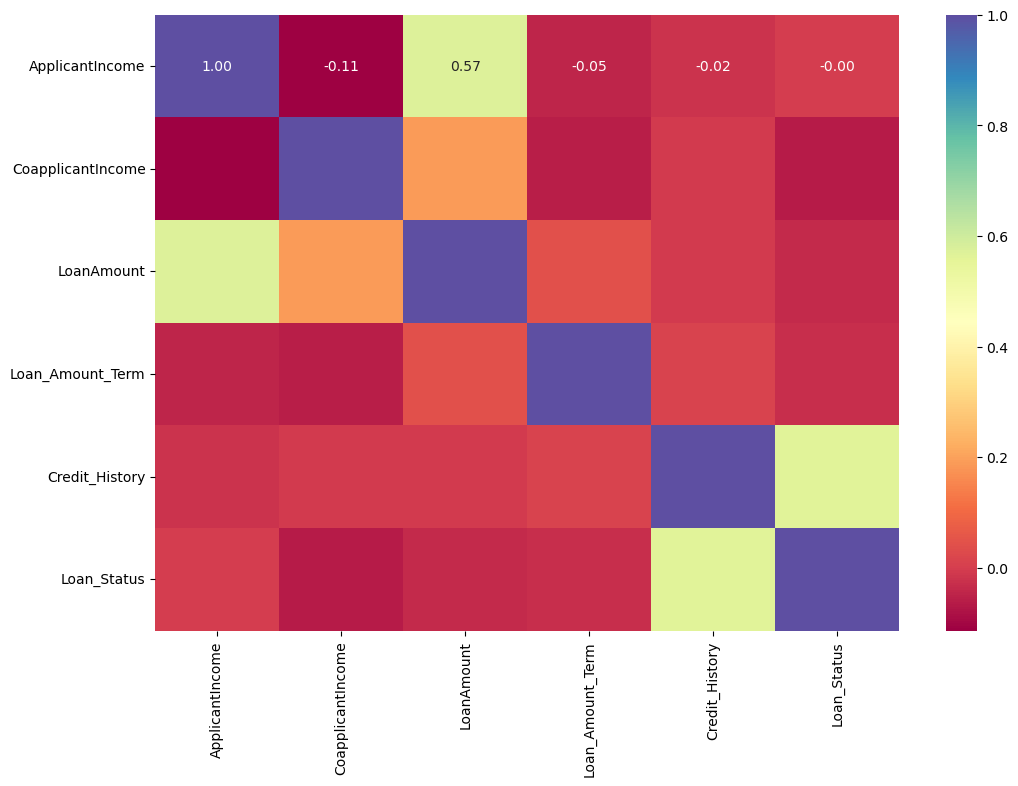

ValueError: could not convert string to float: 'Male'

In [46]:
# Creating heatmap to visualize the relationship between Price and other numerical variables
# Importing libraries for data visualization
import seaborn as sns
loan_data = loan_data.dropna(subset='LoanAmount')
import matplotlib.pyplot as plt
cols_list = loan_data.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (12, 8))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(loan_data[cols_list].corr(), annot = True, fmt = '.2f', cmap = 'Spectral') 
plt.show()
loan_data.corr()

In [47]:
# Create a scatter plot of LoanAmount versus ApplicantIncome

applicant_income_plot = loan_data.hvplot.scatter(
    x="ApplicantIncome",
    y="LoanAmount",
    title="Expected LoanAmount Based on ApplicantIncome"
)
applicant_income_plot

:Scatter   [ApplicantIncome]   (LoanAmount)

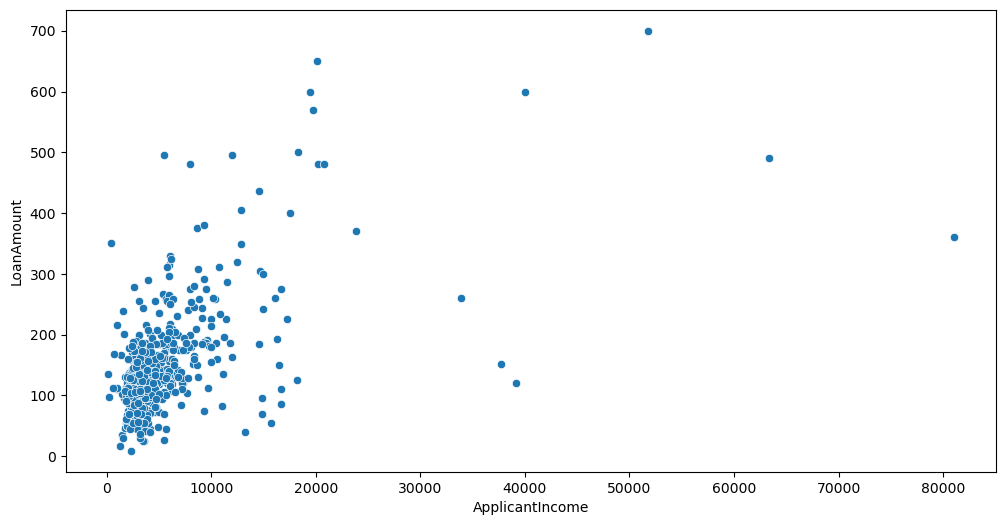

In [48]:
# Scatterplot to visualize the relationship between LoanAmount and ApplicantIncome

plt.figure(figsize = (12, 6))
sns.scatterplot(x = 'ApplicantIncome', y = 'LoanAmount', data = loan_data)
plt.show()

In [50]:
loan_data['TotalApplicantIncome'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']


# Create a scatter plot of LoanAmount versus TotalApplicantIncome

Total_applicant_income_plot = loan_data.hvplot.scatter(
    x="TotalApplicantIncome",
    y="LoanAmount",
    title="Expected LoanAmount Based on TotalIncome"
)
Total_applicant_income_plot


C:\Users\jhaug\AppData\Local\Temp\ipykernel_19940\3484273365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['TotalApplicantIncome'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']


:Scatter   [TotalApplicantIncome]   (LoanAmount)

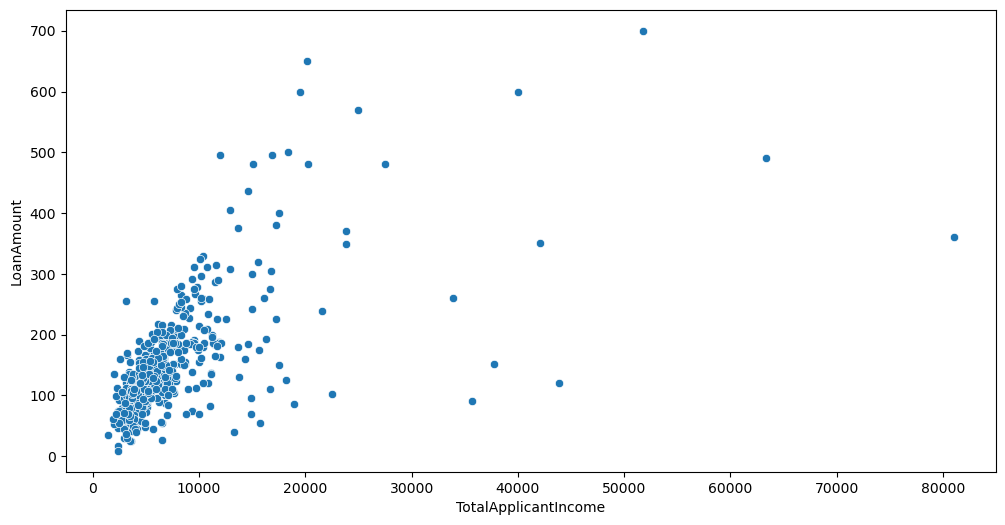

In [51]:
# Scatterplot to visualize the relationship between LoanAmount and TotalIncome

plt.figure(figsize = (12, 6))
sns.scatterplot(x = 'TotalApplicantIncome', y = 'LoanAmount', data = loan_data)
plt.show()

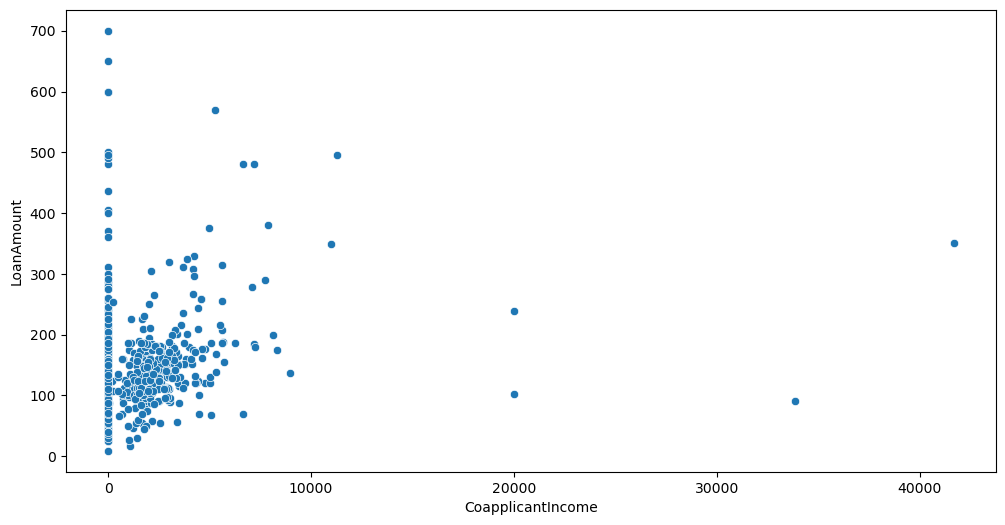

In [52]:
# Scatterplot to visualize the relationship between LoanAmount and CoapplicantIncome

plt.figure(figsize = (12, 6))
loanamountcoapplcaintplot= sns.scatterplot(x = 'CoapplicantIncome', y = 'LoanAmount', data = loan_data)
plt.show()

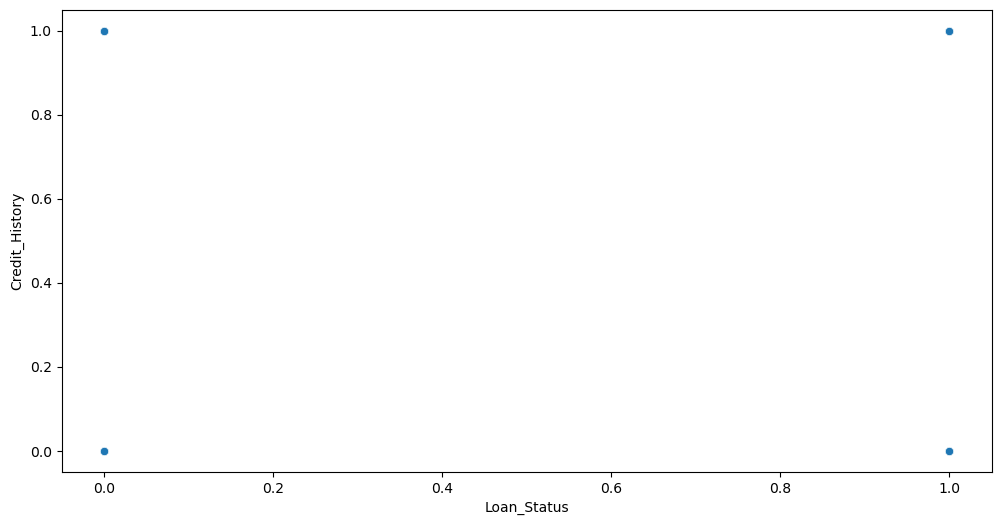

In [53]:
# Scatterplot to visualize the relationship between Loan_Status and Credit_History

plt.figure(figsize = (12, 6))
sns.scatterplot(x = 'Loan_Status', y = 'Credit_History', data = loan_data)
plt.show()

In [54]:
# Reformat data of the independent variable X as a single-column array


X = loan_data["ApplicantIncome"].values.reshape(-1, 1)

# Display sample data
X.shape

(592, 1)

In [55]:
# Create an array for the dependent variable y
y = loan_data["LoanAmount"]

# Display sample data
y.shape


(592,)

In [56]:
# Create a model with scikit-learn
model = LinearRegression()


# Fit the data into the model
model.fit(X,y)

LinearRegression()

In [58]:
# Display the slope
print(f"Model's slope: {model.coef_}")

# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

# Display the model's best fit line formula
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

# Display the formula to predict the loan amount for a person with a salary of $4k per month
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]} * 4000")

# Predict the salary of $4k per month
salary = model.intercept_ + model.coef_[0] * 4000

# Display the prediction
print(f"Predicted loan amount for an applicant's income: ${salary:.2f}")

# Make predictions using the X set
predicted_y_values = model.predict(X)

# Create a copy of the original data
df_Loan_Amount_predicted = loan_data.copy()

# Add a column with the predicted salary values
df_Loan_Amount_predicted["LoanAmount"] = predicted_y_values

# Display sample data
df_Loan_Amount_predicted.head()

best_fit_line = df_Loan_Amount_predicted.hvplot.line(
    x = "ApplicantIncome",
    y = "LoanAmount",
    color = "red"
)
best_fit_line


Model's slope: [0.007927]
Model's y-intercept: 103.57226943567112
Model's formula: y = 103.57226943567112 + 0.00792699527968908X
Model's formula: y = 103.57226943567112 + 0.00792699527968908 * 4000
Predicted loan amount for an applicant's income: $135.28


:Curve   [ApplicantIncome]   (LoanAmount)

In [59]:
# Superpose the original data and the best fit line
applicant_income_plot * best_fit_line

:Overlay
   .Scatter.I :Scatter   [ApplicantIncome]   (LoanAmount)
   .Curve.I   :Curve   [ApplicantIncome]   (LoanAmount)

In [60]:
# Import relevant metrics from scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

# Compute metrics for the linear regression model: score, r2, mse, rmse, std
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.325937130798849.
The r2 is 0.325937130798849.
The mean squared error is 4929.298145295556.
The root mean squared error is 70.20896057694884.
The standard deviation is 85.51500809120331.


In [61]:
# Reformat data of the independent variable X as a single-column array

X = loan_data["TotalApplicantIncome"].values.reshape(-1, 1)

# Display sample data
X.shape

(592, 1)

In [62]:
# Create an array for the dependent variable y
y = loan_data["LoanAmount"]

# Display sample data
y.shape


(592,)

In [63]:
# Create a model with scikit-learn
model = LinearRegression()


# Fit the data into the model
model.fit(X,y)

LinearRegression()

In [64]:
# Display the slope
print(f"Model's slope: {model.coef_}")

# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

# Display the model's best fit line formula
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

# Display the formula to predict the loan amount for a person with a salary of $4k per month
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]} * 4000")

# Predict the salary of $4k per month
salary = model.intercept_ + model.coef_[0] * 4000

# Display the prediction
print(f"Predicted loan amount for an applicant's income: ${salary:.2f}")

# Make predictions using the X set
predicted_y_values = model.predict(X)

# Create a copy of the original data
df_Loan_Amount_predicted = loan_data.copy()

# Add a column with the predicted salary values
df_Loan_Amount_predicted["LoanAmount"] = predicted_y_values

# Display sample data
df_Loan_Amount_predicted.head()

best_fit_line_1 = df_Loan_Amount_predicted.hvplot.line(
    x = "TotalApplicantIncome",
    y = "LoanAmount",
    color = "red"
)
best_fit_line_1


Model's slope: [0.00818653]
Model's y-intercept: 88.72221044818045
Model's formula: y = 88.72221044818045 + 0.00818652823590764X
Model's formula: y = 88.72221044818045 + 0.00818652823590764 * 4000
Predicted loan amount for an applicant's income: $121.47


:Curve   [TotalApplicantIncome]   (LoanAmount)

In [65]:
# Superpose the original data and the best fit line
Total_applicant_income_plot * best_fit_line_1

:Overlay
   .Scatter.I :Scatter   [TotalApplicantIncome]   (LoanAmount)
   .Curve.I   :Curve   [TotalApplicantIncome]   (LoanAmount)

In [32]:
# Import relevant metrics from scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

# Compute metrics for the linear regression model: score, r2, mse, rmse, std
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.3901510138696076.
The r2 is 0.3901510138696076.
The mean squared error is 4459.713794657696.
The root mean squared error is 66.78108860042411.
The standard deviation is 85.51500809120331.


In [ ]:
# # Import necessary libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.metrics import mean_squared_error
# # Separate features (X) and target variable (y)


# XX = X_df[['ApplicantIncome'], ['LoanAmount']]
# # yy = y_df['Loan_Status']


# # # Split the dataset into training and testing sets
# # XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.2, random_state=42)

# # # One-Hot Encoding:
# # encoder_one_hot_1 = OneHotEncoder()
# # XX_train_one_hot = encoder_one_hot.fit_transform(XX_train[['ApplicantIncome', 'LoanAmount']])

# # # Build linear regression model
# # model_one_hot_1 = LinearRegression().fit(XX_train_one_hot, yy_train)

# # # Evaluate model on the test set
# # XX_test_one_hot = encoder_one_hot_1.transform(XX_test[['Loan_Status']])
# # yy_pred_one_hot = model_one_hot_1.predict(XX_test_one_hot)
# # mse_one_hot_1 = mean_squared_error(yy_test, yy_pred_one_hot)
# # print(f"One-Hot Encoding Model - Mean Squared Error: {mse_one_hot_1}")

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [ ]:
# Initiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_model = LogisticRegression(random_state=1)

# Fit the model using training data
logistic_model.fit(X_train, y_train)


### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [ ]:
# Make a prediction using the testing data
y_pred = logistic_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [ ]:
# Generate a confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

In [ ]:
# Print the classification report for the model
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

### Step 4: Answer the following question.

---